In [3]:
#!unzip ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip

In [4]:
import sys
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sys.path.append('/content/drive/MyDrive/single-person-pose-estimation')
from configs import default_config as cfg

In [5]:
from dataset_builder import DatasetBuilder
ds_builder = DatasetBuilder(cfg)

Train dataset with 66 tfrecords and 134214 examples.
Valid dataset with 3 tfrecords and 5647 examples.


In [6]:
def heatmaps_to_keypoints_v1(heatmaps, conf_threshold = 1e-6):
  ''' Work for one batch
  :param heatmaps: shape(64, 64, number of keypoints)
  :return np.array
  '''
  keypoints = np.zeros(shape=(17, 3), dtype=np.float32)
  for i in range(17):
    heatmap = heatmaps[:,:,i]
    index = np.argmax(heatmap) # return index when flattened
    x = index%64
    y = index//64
    conf = heatmap[y, x]
    if conf > conf_threshold:
      keypoints[i, 0] = x
      keypoints[i, 1] = y
      keypoints[i, 2] = conf
    else:
      keypoints[i, 0] = 0
      keypoints[i, 1] = 0
      keypoints[i, 2] = 0
  return keypoints

In [7]:
ds_train, ds_valid = ds_builder.build_datasets()

In [16]:
it = iter(ds_valid)

In [17]:
images_batch, heatmaps_batch = next(it)

Text(0.5, 1.0, 'Overlayed')

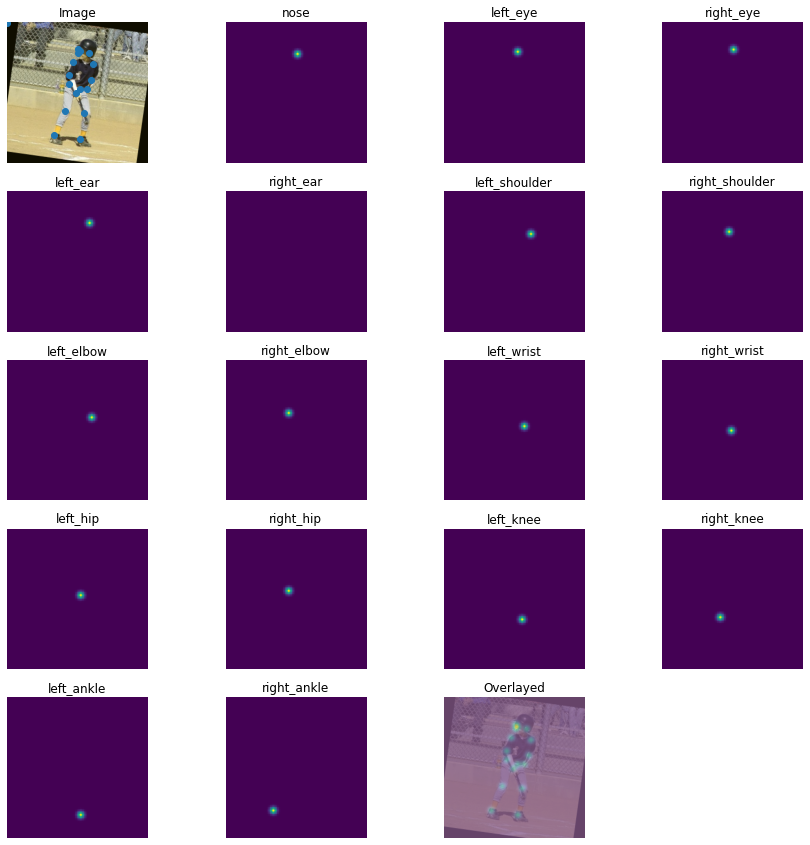

In [15]:
i = 5
img = images_batch[i]
hms = heatmaps_batch[i]
kps = heatmaps_to_keypoints_v1(hms)

num_cols = 4
num_rows = 5
fig = plt.figure(figsize = (15, 15))

# image
fig.add_subplot(num_rows, num_cols, 1)
plt.scatter(kps[:,0]*256/64, kps[:,1]*256/64)
plt.imshow(img)
plt.axis('off')
plt.title('Image')

# heatmaps
for i in range(17):
  fig.add_subplot(num_rows, num_cols, i + 2)
  plt.imshow(hms[:,:,i])
  plt.axis('off')
  plt.title(cfg.COCO_KEYPOINT_LABELS[i])

# combine
fig.add_subplot(num_rows, num_cols, 19)
plt.imshow(img, alpha = 0.5)
h = tf.image.resize(hms, (256, 256))
plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
plt.axis('off')
plt.title('Overlayed')

Text(0.5, 1.0, 'Overlayed')

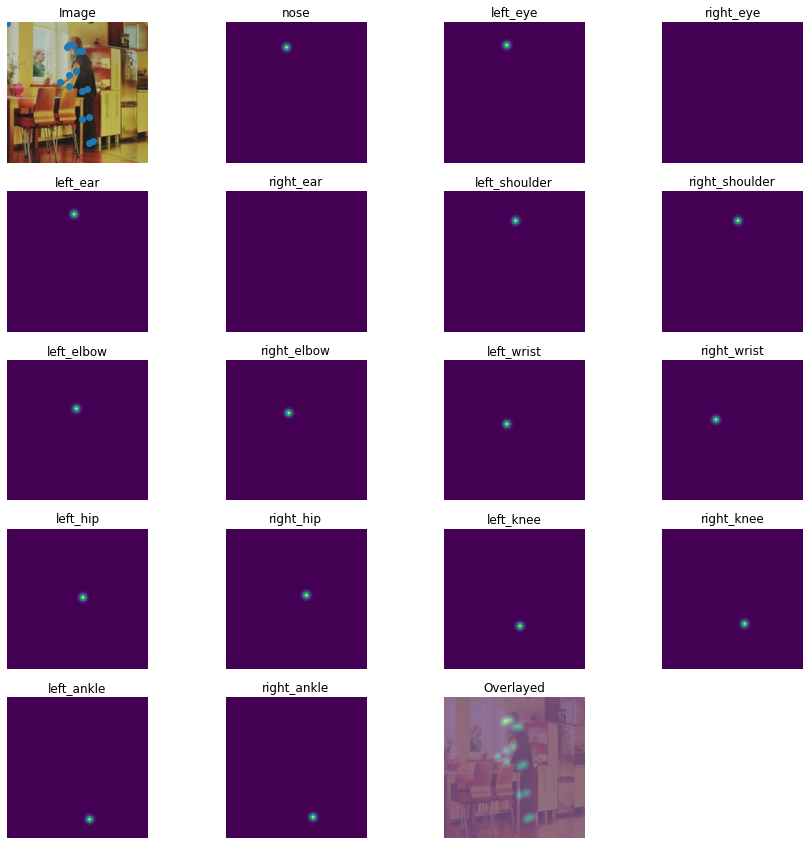

In [18]:
i = 0
img = images_batch[i]
hms = heatmaps_batch[i]
kps = heatmaps_to_keypoints_v1(hms)

num_cols = 4
num_rows = 5
fig = plt.figure(figsize = (15, 15))

# iamge
fig.add_subplot(num_rows, num_cols, 1)
plt.scatter(kps[:,0]*256/64, kps[:,1]*256/64)
plt.imshow(img)
plt.axis('off')
plt.title('Image')

# heatmaps
for i in range(17):
  fig.add_subplot(num_rows, num_cols, i + 2)
  plt.imshow(hms[:,:,i])
  plt.axis('off')
  plt.title(cfg.COCO_KEYPOINT_LABELS[i])
# combine
fig.add_subplot(num_rows, num_cols, 19)
plt.imshow(img, alpha = 0.5)
h = tf.image.resize(hms, (256, 256))
plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
plt.axis('off')
plt.title('Overlayed')